In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive')
SAVE_DIR = '/content/drive/My Drive/dna-nn/figures/'

Mounted at /content/drive


In [3]:
mpl.style.use('seaborn-darkgrid')

In [4]:
alpha = 0.5

acc = ['accuracy', 'val_accuracy']
loss = ['loss', 'val_loss']

In [5]:
def plot_acc_loss(df, ax0, ax1):
    df[acc].ewm(alpha=alpha).mean() \
        .plot(ax=ax0, color=['tab:blue', 'tab:green'])
    df[loss].ewm(alpha=alpha).mean() \
        .plot(ax=ax1, color=['tab:orange', 'tab:red'])
    ax1.set_xlabel('epoch')

def get_ylim(df, margin=0.025):
    return (df.min().min() - margin,
            df.max().max() + margin)

def get_yticklabels(ax):
    return ['{:.2f}'.format(tick) for tick in ax.get_yticks()]

def set_ylim_legend(dfs, axs):
    df = pd.concat([df.ewm(alpha=alpha).mean() for df in dfs])
    for ax in axs[0]:
        ax.set_ylim(get_ylim(df[acc]))
        ax.set_yticklabels([])
        ax.get_legend().set_visible(False)
    for ax in axs[1]:
        ax.set_ylim(get_ylim(df[loss]))
        ax.set_yticklabels([])
        ax.get_legend().set_visible(False)

    axs[0, 0].set_yticklabels(get_yticklabels(axs[0, 0]))
    axs[1, 0].set_yticklabels(get_yticklabels(axs[1, 0]))
    axs[0, 0].set_ylabel('')

    axs[0, -1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axs[1, -1].legend(loc='upper left', bbox_to_anchor=(1, 1))

def set_title(fig, axs, titles, suptitle):
    for ax, title in zip(axs[0], titles):
        ax.set_title(title)
    fig.suptitle(suptitle, y=1.03)

def read_log(index):
    data = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    return pd.read_csv(file.format(index))[data]

# Histone
- v1: two Conv2D
- v2: two Conv2D with l2 regularization
- v3: one Conv1D, two Conv2D
- v4: one Conv1D, two Conv2D with l2 regularization

In [6]:
!ls '/content/drive/My Drive/dna-nn/histone'
file = '/content/drive/My Drive/dna-nn/histone/v{}.csv'

log  v1.csv  v1.h5  v2.csv  v2.h5  v3.csv  v3.h5  v4.csv  v4.h5  v5.csv  v6.csv


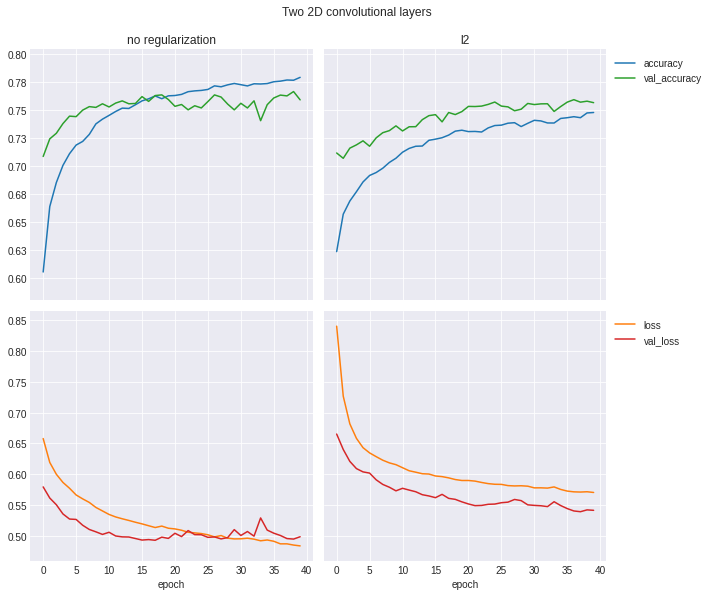

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 8))
v1 = read_log(1)
v2 = read_log(2)

plot_acc_loss(v1, axs[0, 0], axs[1, 0])
plot_acc_loss(v2, axs[0, 1], axs[1, 1])
set_ylim_legend([v1, v2], axs)
set_title(fig, axs, ['no regularization', 'l2'], 'Two 2D convolutional layers')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'two-conv2d', bbox_inches='tight')
plt.show()

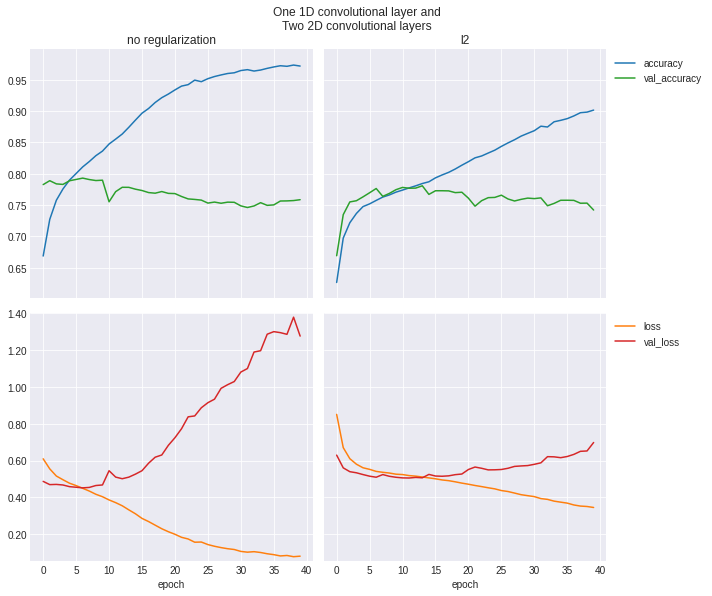

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 8))
v3 = read_log(3)
v4 = read_log(4)

plot_acc_loss(v3, axs[0, 0], axs[1, 0])
plot_acc_loss(v4, axs[0, 1], axs[1, 1])
set_ylim_legend([v3, v4], axs)

set_title(fig, axs, ['no regularization', 'l2'],
          'One 1D convolutional layer and\nTwo 2D convolutional layers')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'one-conv1d-two-conv2d', bbox_inches='tight')
plt.show()

In [ ]:
result = pd.concat({'v1': v1, 'v2': v2, 'v3': v3, 'v4': v4})
result[acc].max(level=0)

,accuracy,val_accuracy
v1,0.782011,0.770601
v2,0.751838,0.761693
v3,0.975461,0.795100
v4,0.904803,0.784410


In [13]:
for i in range(1, 5):
    model = keras.models.load_model(file.format(i).replace('csv', 'h5'))
    keras.utils.plot_model(model, SAVE_DIR + f'histone-v{i}.png')

# ChIP-seq
- v1: two Conv2d
- v2: three Conv2d
- v3: four Conv2d
- v4: four Conv2d with l2

In [14]:
!ls '/content/drive/My Drive/dna-nn/motif-discovery'
file = '/content/drive/My Drive/dna-nn/motif-discovery/v{}.csv'

log  v1.csv  v1.h5  v2.csv  v2.h5  v3.csv  v3.h5  v4.csv  v4.h5


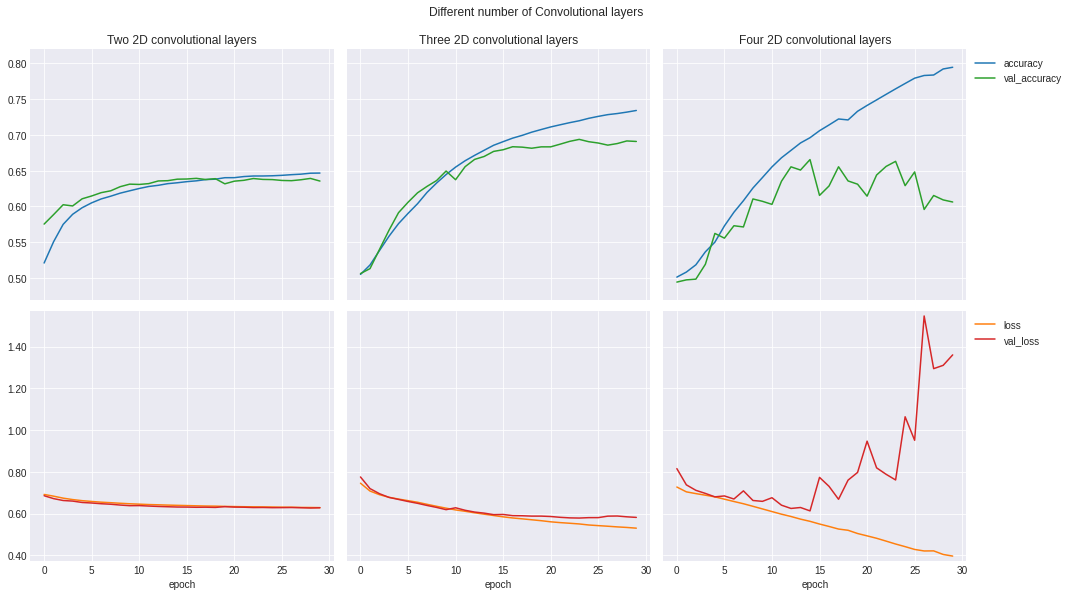

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, figsize=(15, 8))
v1 = read_log(1)
v2 = read_log(2)
v3 = read_log(3)

plot_acc_loss(v1, axs[0, 0], axs[1, 0])
plot_acc_loss(v2, axs[0, 1], axs[1, 1])
plot_acc_loss(v3, axs[0, 2], axs[1, 2])
set_ylim_legend([v1, v2, v3], axs)
set_title(fig, axs, ['Two 2D convolutional layers',
                     'Three 2D convolutional layers',
                     'Four 2D convolutional layers'],
          'Different number of Convolutional layers')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'two-to-four-layers', bbox_inches='tight')
plt.show()

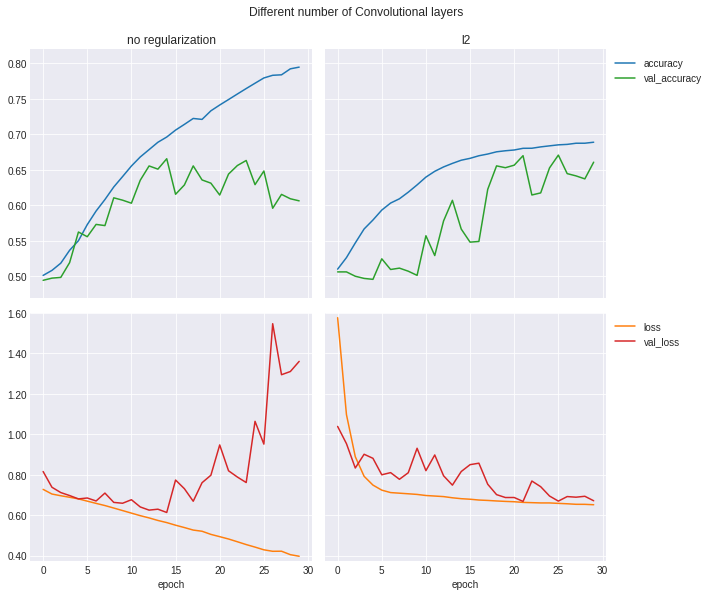

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 8))
v4 = read_log(4)

plot_acc_loss(v3, axs[0, 0], axs[1, 0])
plot_acc_loss(v4, axs[0, 1], axs[1, 1])
set_ylim_legend([v3, v4], axs)
set_title(fig, axs, ['no regularization', 'l2'],
          'Different number of Convolutional layers')
plt.tight_layout()
plt.savefig(SAVE_DIR + 'four-layer-reg', bbox_inches='tight')
plt.show()

In [ ]:
result = pd.concat({'v1': v1, 'v2': v2, 'v3': v3, 'v4': v4})
result[acc].max(level=0)

,accuracy,val_accuracy
v1,0.647780,0.641449
v2,0.736537,0.696522
v3,0.800748,0.682319
v4,0.690221,0.695797


In [15]:
for i in range(1, 5):
    model = keras.models.load_model(file.format(i).replace('csv', 'h5'))
    keras.utils.plot_model(model, SAVE_DIR + f'motif-discovery-v{i}.png')

# DeepRAM

In [21]:
!ls '/content/drive/My Drive/dna-nn/deepram/embedding'
!ls '/content/drive/My Drive/dna-nn/deepram/onehot'
file = '/content/drive/My Drive/dna-nn/deepram/{}/{}/v1-base.csv'

from itertools import product
encodings = ['embedding', 'onehot']
archs = ['conv1d', 'conv1d-recurrent', 'recurrent']

conv1d	conv1d-recurrent  recurrent
conv1d	conv1d-recurrent  recurrent


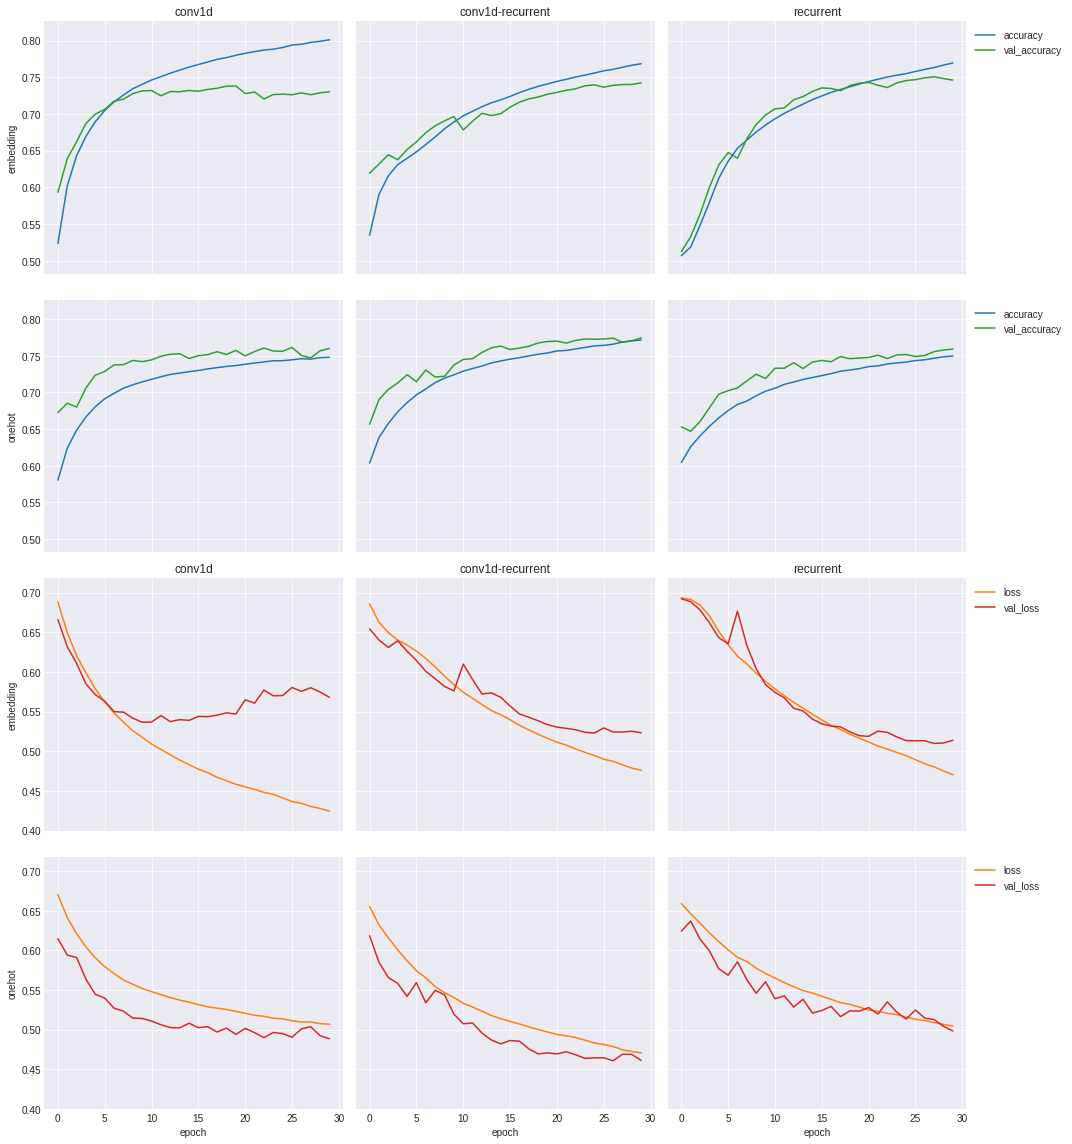

In [ ]:
fig, axs = plt.subplots(4, 3, sharex=True, figsize=(15, 16))
dfs = {}

for (encoding, arch), ax0, ax1 in zip(product(encodings, archs),
                                      axs[[0, 1]].ravel(), axs[[2, 3]].ravel()):
    df = pd.read_csv(file.format(encoding, arch))[acc + loss]
    plot_acc_loss(df, ax0, ax1)
    dfs[f'{encoding}-{arch}'] = df

set_ylim_legend(dfs.values(), axs[[0, 2]])
set_ylim_legend(dfs.values(), axs[[1, 3]])
set_title(fig, axs[[0, 1]], archs, '')
set_title(fig, axs[[2, 3]], archs, '')

axs[0, 0].set_ylabel(encodings[0])
axs[1, 0].set_ylabel(encodings[1])
axs[2, 0].set_ylabel(encodings[0])
axs[3, 0].set_ylabel(encodings[1])

plt.savefig(SAVE_DIR + 'cnn-rnn', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
pd.concat(dfs)[acc].max(level=0)

,accuracy,val_accuracy
embedding-conv1d,0.803303,0.740725
embedding-conv1d-recurrent,0.770351,0.744638
embedding-recurrent,0.772365,0.752319
onehot-conv1d,0.749352,0.766377
onehot-conv1d-recurrent,0.772265,0.778261
onehot-recurrent,0.750488,0.760870


In [24]:
for (encoding, arch) in product(encodings, archs):
    model = keras.models.load_model(file.format(encoding, arch).replace('csv', 'h5'))
    keras.utils.plot_model(model, SAVE_DIR + f'deepram-{encoding}-{arch}.png')

# CIFAR-10

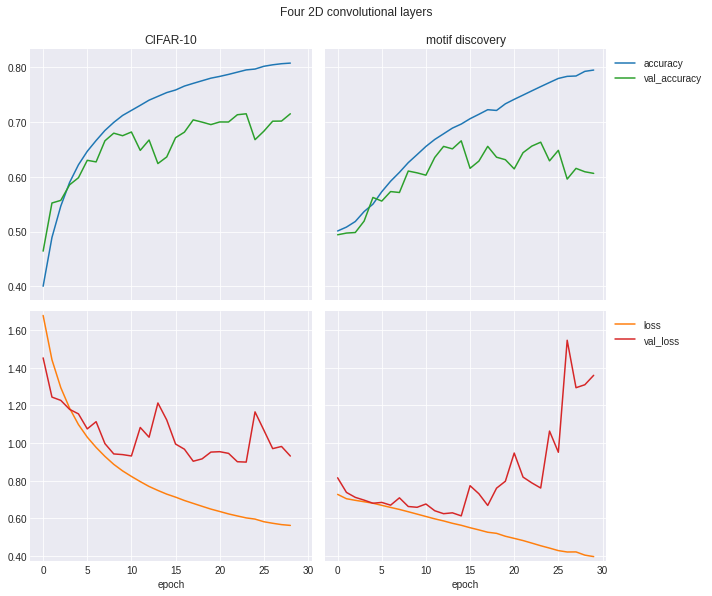

In [ ]:
cifar = pd.read_csv('/content/drive/My Drive/dna-nn/cifar-10/log.csv').iloc[0:29]
motif = pd.read_csv('/content/drive/My Drive/dna-nn/motif-discovery/v3.csv')

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 8))
plot_acc_loss(cifar, axs[0, 0], axs[1, 0])
plot_acc_loss(motif, axs[0, 1], axs[1, 1])
set_ylim_legend([cifar, motif], axs)
set_title(fig, axs, ['CIFAR-10', 'motif discovery'], 'Four 2D convolutional layers')

plt.tight_layout()
plt.savefig(SAVE_DIR + 'cifar-10-comparison', bbox_inches='tight')
plt.show()